In [1]:
import pickle as pk
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('./alldata.txt')
data.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,60148.0,22.0,6.0,166.0,1.0,1.0,0.0,0.0,0.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,22.0,60148.0,6.0,83.0,1.0,2.0,0.0,0.0,0.0,0.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,123.0,123.0,17.0,99947.0,1.0,1.0,48.0,48.0,48.0,48.0,...,40.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,123.0,123.0,17.0,37017.0,1.0,1.0,48.0,48.0,48.0,48.0,...,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
4,0.0,0.0,0.0,111161336.0,147.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN


### Normalization
We compress all the data in the range [0, 1]

In [3]:
X = data.drop(['Label'], axis=1)
X_data = (X - X.min())/(X.max() - X.min())
X_data.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.917800,0.000336,0.352941,1.491667e-06,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.000336,0.917800,0.352941,7.999999e-07,0.000000,0.000007,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,0.001877,0.001877,1.000000,8.329999e-04,0.000000,0.000003,0.000004,7.323179e-08,0.001934,0.020645,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,0.001877,0.001877,1.000000,3.085833e-04,0.000000,0.000003,0.000004,7.323179e-08,0.001934,0.020645,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,9.263445e-01,0.000664,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,1.0,0.015943,0.028615,0.043845,8.636364e-07,0.078859,0.034561,0.113333,0.047502


We found find some nans in the table, ehich means the column is constant, thus useless. We thereby remove them from the table.

In [4]:
X_data = X_data.drop(X_data.columns[X_data.isna().any().tolist()], axis=1)
# X_data.head()
X_data = np.float32(X_data)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.917800,0.000336,0.352941,1.491667e-06,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.000336,0.917800,0.352941,7.999999e-07,0.000000,0.000007,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,0.001877,0.001877,1.000000,8.329999e-04,0.000000,0.000003,0.000004,7.323179e-08,0.001934,0.020645,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,0.001877,0.001877,1.000000,3.085833e-04,0.000000,0.000003,0.000004,7.323179e-08,0.001934,0.020645,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,9.263445e-01,0.000664,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,1.0,0.015943,0.028615,0.043845,8.636364e-07,0.078859,0.034561,0.113333,0.047502


### Auto-encoder
We construct a 2-layer nn (encoder and decoder) to reconstruct the dataset.
Rationale: Anomalies will not be constructed as well as normal data

In [61]:
# Hyperparameters
learning_rate = 0.00001
num_steps = 30000
batch_size = 256
display_step = 1000
# examples_to_show = 10

#architecture
num_hidden_1 = 256
num_hidden_2 = 128
num_input = 70

#Data matrix
# X_dataMatrix = X_data.as_matrix()
X_dataMatrix = np.float32(X_dataMatrix)
X_dataMatrix.shape

#Construct the graph 

#Define weight matrices
X = tf.placeholder(tf.float32, [None, num_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
} #initialize with normal variables

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

#Define encoding and decoding
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1 Wx+b
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

#Define loss and optimizer

Y_pred = decoder_op
Y = X
diff = Y_pred - Y
loss = tf.reduce_mean(tf.square(diff))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#shuffle the data


#run the graph
sess = tf.Session()

sess.run(tf.global_variables_initializer())
#     sess.run(iterator.initializer)
cnt = 0
cntMax = X_dataMatrix.shape[0]/batch_size
for i in range(1, num_steps+1):
    cnt = cnt + 1
    if cnt > cntMax:
        np.random.shuffle(X_dataMatrix)
        cnt = 1
    _, l = sess.run([optimizer, loss],
                    feed_dict={X: X_dataMatrix[(cnt - 1) * batch_size : cnt * batch_size, :]})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))


Step 1: Minibatch Loss: 0.379183
Step 1000: Minibatch Loss: 0.211705
Step 2000: Minibatch Loss: 0.138911
Step 3000: Minibatch Loss: 0.121358
Step 4000: Minibatch Loss: 0.109958
Step 5000: Minibatch Loss: 0.106630
Step 6000: Minibatch Loss: 0.080362
Step 7000: Minibatch Loss: 0.076472
Step 8000: Minibatch Loss: 0.049414
Step 9000: Minibatch Loss: 0.046523
Step 10000: Minibatch Loss: 0.033651
Step 11000: Minibatch Loss: 0.032071
Step 12000: Minibatch Loss: 0.031809
Step 13000: Minibatch Loss: 0.022018
Step 14000: Minibatch Loss: 0.018223
Step 15000: Minibatch Loss: 0.015502
Step 16000: Minibatch Loss: 0.004851
Step 17000: Minibatch Loss: 0.004521
Step 18000: Minibatch Loss: 0.005851
Step 19000: Minibatch Loss: 0.005940
Step 20000: Minibatch Loss: 0.003245
Step 21000: Minibatch Loss: 0.005072
Step 22000: Minibatch Loss: 0.004755
Step 23000: Minibatch Loss: 0.004683
Step 24000: Minibatch Loss: 0.004307
Step 25000: Minibatch Loss: 0.003612
Step 26000: Minibatch Loss: 0.003381
Step 27000: Mi

ROC score =  0.7108201720586976


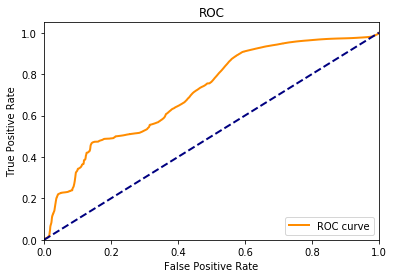

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Difference between original data and reconstructed data
def rowError(X, X_pred):
    return np.square(X_pred - X).sum(axis=1)

#predict the new X
y = 1 - np.float32(data['Label'] == 'BENIGN')
X_pred = sess.run(decoder(encoder(X_data)))

#calculate the error
X_error = rowError(X_data, X_pred)

#Calculate ROC score
print('ROC score = ', roc_auc_score(y, X_error))

#Define ROC curve
fpr, tpr, thresholds = roc_curve(y, X_error)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

In [69]:
y_pred = np.float32(X_error > thresholds[np.argmax(tpr - fpr)])
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
CM = confusion_matrix(y, y_pred)
#pas mal!

array([[1945521,  327576],
       [ 295909,  261737]])

In [77]:
def accuracy(mat):
    return (mat[0][0] + mat[1][1])/mat.sum()
def precision(mat):
    return mat[0][0]/(mat[0][0] + mat[1][0])
def recall(mat):
    return mat[0][0]/(mat[0][0] + mat[0][1])

def show_result(mat):
    print('Accuracy = ' + str(accuracy(mat)) )
    print('Precision = ' + str(precision(mat)) )
    print('Recall = ' + str(recall(mat)) )

In [78]:
show_result(CM)

Accuracy = 0.7797451057902466
Precision = 0.8679820471752409
Recall = 0.8558900038141795
